# Import

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Exploration

 Téléchargez les données suivantes : https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews. L'objectif est d'entrainer un modèle à détecter si la description d'un film est positive ou négative.

In [2]:
data = pd.read_csv('../../data/sentiment-analysis/train.csv')
data.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [3]:
data.shape

(50000, 2)

On va pouvoir se créer un jeu de validation, il y a pas mal de données. Les classes sont elles équilibrées ? 

In [4]:
data['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

On va maintenant encoder la colonne sentiment :

In [5]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['sentiment'] = label_encoder.fit_transform(data['sentiment'])
data.head()

review  sentiment
0  One of the other reviewers has mentioned that ...          1
1  A wonderful little production. <br /><br />The...          1
2  I thought this was a wonderful way to spend ti...          1
3  Basically there's a family where a little boy ...          0
4  Petter Mattei's "Love in the Time of Money" is...          1

Observons la différence de longueur  des reviews

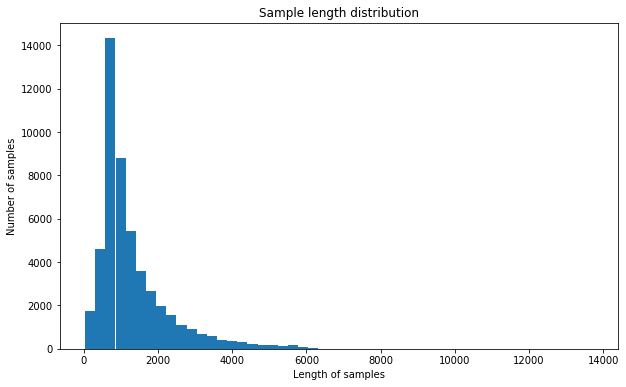

In [6]:
# Now, let's see the average number of words per sample
plt.figure(figsize=(10, 6))
plt.hist([len(sample) for sample in list(data['review'])], 50)
plt.xlabel('Length of samples')
plt.ylabel('Number of samples')
plt.title('Sample length distribution')
plt.show()

# Séparation

In [7]:
# ???séparer le jeu de données 80% train, 20%val ???
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(data[['review']], data[['sentiment']], test_size=0.2, random_state=0)

In [8]:
X_train.shape

(40000, 1)

In [9]:
X_val.shape

(10000, 1)

# Nettoyage 

In [10]:
# def clean_text(sentence):
    

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

def vectorize_data(max_features=1000):    
    vectorizer = CountVectorizer(max_features=max_features)
    X_train_vect_texts = vectorizer.fit_transform(X_train['review'])
    X_val_vect_texts = vectorizer.transform(X_val['review'])
    return X_train_vect_texts, X_val_vect_texts

In [12]:
X_train_vect_texts, X_val_vect_texts = vectorize_data(max_features=1000)

# Création du model avec Keras

In [13]:
from tensorflow.python.keras import models
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import Dropout
from tensorflow import keras

In [20]:
X_train.shape[0]

40000

In [34]:
X_train_vect_texts[0].shape[1]

1000

In [29]:
def build_model(input_shape, DROPOUT_RATE = 0.2, UNITS = 64, NUM_CLASSES = 2):

    model = keras.Sequential()
    # Applies Dropout to the input
    model.add(Dropout(rate=DROPOUT_RATE, input_shape=input_shape)) # ?
    model.add(Dense(units=UNITS, activation='relu'))
    model.add(Dropout(rate=DROPOUT_RATE))
    #Last layer
    model.add(Dense(units=1, activation='sigmoid'))
    model.summary()
    return model

In [35]:
model = build_model(X_train_vect_texts[0].shape[1:])

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_13 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                64064     
_________________________________________________________________
dropout_14 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 64,129
Trainable params: 64,129
Non-trainable params: 0
_________________________________________________________________


## Compilation

In [36]:
LEARNING_RATE = 1e-3
optimizer = tf.keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['BinaryAccuracy'])

# Entrainement

In [37]:
def train_model(EPOCHS = 100, BATCH_SIZE = 128, patience=5):
    
    # Create callback for early stopping on validation loss. If the loss does
    # not decrease on two consecutive tries, stop training
    callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=patience)]


    history = model.fit(X_train_vect_texts, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=callbacks)
    return history 

In [38]:
history = train_model(EPOCHS = 100, BATCH_SIZE = 128, patience=5)

Train on 40000 samples
Epoch 1/100
40000/40000 [==============================] - 1s 22us/sample - loss: 0.1519 - binary_accuracy: 0.7831
Epoch 2/100
40000/40000 [==============================] - 1s 16us/sample - loss: 0.1138 - binary_accuracy: 0.8444
Epoch 3/100
40000/40000 [==============================] - 1s 17us/sample - loss: 0.1078 - binary_accuracy: 0.8518
Epoch 4/100
40000/40000 [==============================] - 1s 21us/sample - loss: 0.1044 - binary_accuracy: 0.8584
Epoch 5/100
40000/40000 [==============================] - 1s 19us/sample - loss: 0.1014 - binary_accuracy: 0.8606
Epoch 6/100
40000/40000 [==============================] - 1s 18us/sample - loss: 0.0977 - binary_accuracy: 0.8659
Epoch 7/100
40000/40000 [==============================] - 1s 19us/sample - loss: 0.0944 - binary_accuracy: 0.8722
Epoch 8/100
40000/40000 [==============================] - 1s 19us/sample - loss: 0.0923 - binary_accuracy: 0.8744
Epoch 9/100
40000/40000 [==============================] 

Epoch 25/100
40000/40000 [==============================] - 1s 16us/sample - loss: 0.0621 - binary_accuracy: 0.9186
Epoch 26/100
40000/40000 [==============================] - 1s 16us/sample - loss: 0.0606 - binary_accuracy: 0.9217
Epoch 27/100
40000/40000 [==============================] - 1s 17us/sample - loss: 0.0595 - binary_accuracy: 0.9220
Epoch 28/100
40000/40000 [==============================] - 1s 17us/sample - loss: 0.0585 - binary_accuracy: 0.9232
Epoch 29/100
40000/40000 [==============================] - 1s 17us/sample - loss: 0.0578 - binary_accuracy: 0.9237
Epoch 30/100
40000/40000 [==============================] - 1s 16us/sample - loss: 0.0567 - binary_accuracy: 0.9264
Epoch 31/100
40000/40000 [==============================] - 1s 17us/sample - loss: 0.0560 - binary_accuracy: 0.9266
Epoch 32/100
40000/40000 [==============================] - 1s 17us/sample - loss: 0.0556 - binary_accuracy: 0.9272
Epoch 33/100
40000/40000 [==============================] - 1s 17us/samp

Epoch 49/100
40000/40000 [==============================] - 1s 17us/sample - loss: 0.0479 - binary_accuracy: 0.9373
Epoch 50/100
40000/40000 [==============================] - 1s 17us/sample - loss: 0.0490 - binary_accuracy: 0.9357
Epoch 51/100
40000/40000 [==============================] - 1s 17us/sample - loss: 0.0474 - binary_accuracy: 0.9381
Epoch 52/100
40000/40000 [==============================] - 1s 16us/sample - loss: 0.0468 - binary_accuracy: 0.9382
Epoch 53/100
40000/40000 [==============================] - 1s 16us/sample - loss: 0.0472 - binary_accuracy: 0.9389
Epoch 54/100
40000/40000 [==============================] - 1s 18us/sample - loss: 0.0472 - binary_accuracy: 0.9378
Epoch 55/100
40000/40000 [==============================] - 1s 18us/sample - loss: 0.0462 - binary_accuracy: 0.9396
Epoch 56/100
40000/40000 [==============================] - 1s 16us/sample - loss: 0.0474 - binary_accuracy: 0.9379
Epoch 57/100
40000/40000 [==============================] - 1s 16us/samp

Epoch 73/100
40000/40000 [==============================] - 1s 20us/sample - loss: 0.0427 - binary_accuracy: 0.9441
Epoch 74/100
40000/40000 [==============================] - 1s 18us/sample - loss: 0.0429 - binary_accuracy: 0.9438
Epoch 75/100
40000/40000 [==============================] - 1s 16us/sample - loss: 0.0428 - binary_accuracy: 0.9442
Epoch 76/100
40000/40000 [==============================] - 1s 16us/sample - loss: 0.0429 - binary_accuracy: 0.9429
Epoch 77/100
40000/40000 [==============================] - 1s 15us/sample - loss: 0.0419 - binary_accuracy: 0.9451
Epoch 78/100
40000/40000 [==============================] - 1s 16us/sample - loss: 0.0426 - binary_accuracy: 0.9448
Epoch 79/100
40000/40000 [==============================] - 1s 16us/sample - loss: 0.0429 - binary_accuracy: 0.9436
Epoch 80/100
40000/40000 [==============================] - 1s 15us/sample - loss: 0.0412 - binary_accuracy: 0.9462
Epoch 81/100
40000/40000 [==============================] - 1s 16us/samp

Epoch 97/100
40000/40000 [==============================] - 1s 16us/sample - loss: 0.0404 - binary_accuracy: 0.9466
Epoch 98/100
40000/40000 [==============================] - 1s 16us/sample - loss: 0.0395 - binary_accuracy: 0.9484
Epoch 99/100
40000/40000 [==============================] - 1s 16us/sample - loss: 0.0390 - binary_accuracy: 0.9497
Epoch 100/100
40000/40000 [==============================] - 1s 16us/sample - loss: 0.0404 - binary_accuracy: 0.9466


On constate que notre modèle stagne assez vite, probablement lié au fait du faible volume de données, peut-être que l'on peut augmenter le nombre de feautres ?

In [43]:
X_train_vect_texts, X_val_vect_texts = vectorize_data(max_features=10000)

In [45]:
X_train_vect_texts.shape[1:]

(10000,)

In [46]:
X_train_vect_texts.shape[1]

10000

In [47]:
model = build_model(X_train_vect_texts.shape[1:])

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_18 (Dropout)         (None, 10000)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                640064    
_________________________________________________________________
dropout_19 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 65        
Total params: 640,129
Trainable params: 640,129
Non-trainable params: 0
_________________________________________________________________


In [48]:
#compile
LEARNING_RATE = 1e-3
optimizer = tf.keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [49]:
history = train_model(EPOCHS = 100, BATCH_SIZE = 128, patience=5)

Train on 40000 samples
Epoch 1/100
40000/40000 [==============================] - 4s 107us/sample - loss: 0.3696 - acc: 0.8441
Epoch 2/100
40000/40000 [==============================] - 5s 126us/sample - loss: 0.2522 - acc: 0.9008
Epoch 3/100
40000/40000 [==============================] - 5s 117us/sample - loss: 0.2142 - acc: 0.9145
Epoch 4/100
40000/40000 [==============================] - 4s 112us/sample - loss: 0.1851 - acc: 0.9277
Epoch 5/100
40000/40000 [==============================] - 5s 116us/sample - loss: 0.1647 - acc: 0.9337
Epoch 6/100
40000/40000 [==============================] - 7s 170us/sample - loss: 0.1416 - acc: 0.9443
Epoch 7/100
40000/40000 [==============================] - 6s 149us/sample - loss: 0.1247 - acc: 0.9531
Epoch 8/100
40000/40000 [==============================] - 5s 117us/sample - loss: 0.1066 - acc: 0.9601
Epoch 9/100
40000/40000 [==============================] - 5s 118us/sample - loss: 0.0954 - acc: 0.9651
Epoch 10/100
40000/40000 [===============

40000/40000 [==============================] - 5s 116us/sample - loss: 0.0317 - acc: 0.9892
Epoch 28/100
40000/40000 [==============================] - 6s 141us/sample - loss: 0.0327 - acc: 0.9893
Epoch 29/100
40000/40000 [==============================] - 5s 135us/sample - loss: 0.0317 - acc: 0.9887
Epoch 30/100
40000/40000 [==============================] - 4s 108us/sample - loss: 0.0309 - acc: 0.9894
Epoch 31/100
40000/40000 [==============================] - 4s 98us/sample - loss: 0.0309 - acc: 0.9896
Epoch 32/100
40000/40000 [==============================] - 4s 109us/sample - loss: 0.0317 - acc: 0.9893
Epoch 33/100
40000/40000 [==============================] - 4s 109us/sample - loss: 0.0266 - acc: 0.9910
Epoch 34/100
40000/40000 [==============================] - 4s 108us/sample - loss: 0.0267 - acc: 0.9916
Epoch 35/100
40000/40000 [==============================] - 4s 106us/sample - loss: 0.0293 - acc: 0.9902
Epoch 36/100
40000/40000 [==============================] - 6s 145us/

40000/40000 [==============================] - 4s 106us/sample - loss: 0.0198 - acc: 0.9931
Epoch 55/100
40000/40000 [==============================] - 4s 110us/sample - loss: 0.0202 - acc: 0.9931
Epoch 56/100
40000/40000 [==============================] - 4s 104us/sample - loss: 0.0215 - acc: 0.9928
Epoch 57/100
40000/40000 [==============================] - 5s 121us/sample - loss: 0.0179 - acc: 0.9936
Epoch 58/100
40000/40000 [==============================] - 4s 106us/sample - loss: 0.0203 - acc: 0.9933
Epoch 59/100
40000/40000 [==============================] - 5s 132us/sample - loss: 0.0208 - acc: 0.9927
Epoch 60/100
40000/40000 [==============================] - 5s 127us/sample - loss: 0.0221 - acc: 0.9930
Epoch 61/100
40000/40000 [==============================] - 6s 140us/sample - loss: 0.0178 - acc: 0.9937
Epoch 62/100
40000/40000 [==============================] - 5s 135us/sample - loss: 0.0165 - acc: 0.9941
Epoch 63/100
40000/40000 [==============================] - 5s 136us

40000/40000 [==============================] - 6s 146us/sample - loss: 0.0179 - acc: 0.9937
Epoch 81/100
40000/40000 [==============================] - 6s 148us/sample - loss: 0.0163 - acc: 0.9943
Epoch 82/100
40000/40000 [==============================] - 5s 117us/sample - loss: 0.0173 - acc: 0.9946
Epoch 83/100
40000/40000 [==============================] - 4s 112us/sample - loss: 0.0158 - acc: 0.9948
Epoch 84/100
40000/40000 [==============================] - 4s 109us/sample - loss: 0.0155 - acc: 0.9949
Epoch 85/100
40000/40000 [==============================] - 5s 135us/sample - loss: 0.0163 - acc: 0.9942
Epoch 86/100
40000/40000 [==============================] - 5s 122us/sample - loss: 0.0168 - acc: 0.9945
Epoch 87/100
40000/40000 [==============================] - 4s 109us/sample - loss: 0.0155 - acc: 0.9950
Epoch 88/100
40000/40000 [==============================] - 5s 119us/sample - loss: 0.0153 - acc: 0.9946
Epoch 89/100
40000/40000 [==============================] - 5s 122us

On peut observer que les résultats semblent plus intéressants > + 0.04 en val_acc
Essayons d'analyser nos résultats

# Analyse des résultats

In [57]:
X_train_vect_texts

<1x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 36 stored elements in Compressed Sparse Row format>

In [58]:
y_val_pred = model.predict_classes(X_train_vect_texts)

In [80]:
(y_val_pred.T)[0]

array([0, 0, 1, ..., 1, 0, 1], dtype=int32)

In [66]:
np.array(y_train['sentiment'])

array([0, 0, 1, ..., 1, 0, 1])

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(np.array(y_train['sentiment']), (y_val_pred.T)[0])
print(cf_matrix)

[[19964     1]
 [    0 20035]]


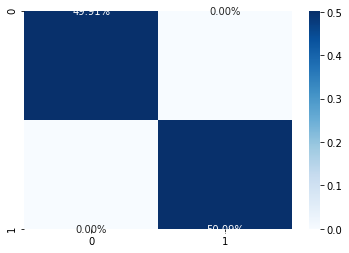

In [81]:
import seaborn as sns
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

0 negatif
1 positif


Visiblement  on a tendance a dire un peu trop souvent qu'une donnée positive est négative

Y a t'il une longuer de review que l'on prédit moins bien ?

In [82]:
val_is_good_pred = y_val.values == y_val_pred.flatten()

In [87]:
reviews_val_len = X_val.apply(lambda x : len(x)  //500 * 500).values 

In [84]:
df = pd.DataFrame({"len" :reviews_val_len, "pred": val_is_good_pred})

Exception: Data must be 1-dimensional

In [85]:
df = df[df["pred"] == False]

NameError: name 'df' is not defined

In [86]:
df.groupby(['len','pred']).agg({'pred': ['count']})

SyntaxError: invalid syntax (<ipython-input-86-5cf1327f1173>, line 1)